## Notes for [Machine Learning in Python](http://www.amazon.com/Machine-Learning-Python-Techniques-Predictive/dp/1118961749)

### 1. Understand the problem by understanding the data
* Exploratory data analysis
    * Data summary
    * Missing data
    * Data plot (normalized)
    * Correlation plot (heat map)
    
### 2. Predictive Modeling
* Feature selection and engineering
* Choose proper method
* Train and test split
* Messure the performance (confusion matrix, MSE, MAE et al.)
* Model selection
    * Forward stepwise
    * Backward stepwise
    * Ridge
    * Larsso
 
ROC curve yields a single plot that summarizes all of these different contingency tables. The ROC curve plots the true positive rate (abbreviated TPR) versus the false positive rate (FPR). TPR is the proportion of positive examples that are correctly classified as positive. FPR is the number of FPs relative to the total number of actual negatives. 

The closer that a classifier can come to hitting the upper-left corner, the better it is. If the ROC curve drops significantly below the diagonal line, it usually means that the data scientist has gotten a sign switched somewhere and should examine his code carefully.

The area under the curve (AUC)is the area under the ROC curve. A perfect classifier has an AUC of 1.0, and random guessing has an AUC of 0.5.

### 3. Ensemble Methods

* Boosting: Gradient boosting develops an ensemble of treebased models by training each of the trees in the ensemble on different labels and then combining the trees. For a regression problem where the objective is to minimize MSE, each successive tree is trained on the errors left over by the collection of earlier trees. The basic difference in principle between bagging and boosting is that boosting constantly monitors its cumulative error and uses that residual for subsequent training.
* Bagging: A (nonparametric) bootstrap sample is a random selection of several elements from the data set with replacement (that is, a bootstrap sample can contain multiple copies of a row from the original data). Bootstrap aggregation takes a number of bootstrap samples from the training data set and then trains a base learner on each of these samples. The resulting models are averaged in regression problems. For classification problems, the models can either be averaged or probabilities can be developed based on the percentages of different classes.
* Random Forest: Bagging plus random attribute subsets.

## Notes for [Scikit-learn Cookbook](http://www.amazon.com/Scikit-Learn-Cookbook-Trent-Hauck/dp/1783989483/ref=sr_1_1?ie=UTF8&qid=1450218817&sr=8-1&keywords=scikit-learn)

### Ch1. Premodel workflow

Two preprocessing scalers:

* StandardScaler(): minus mean, and then divided by std
* MinMaxScaler(): scale the data within certain range, `MinMaxScaler(feature_range=(-3.14, 3.14))`
* normalize(): scale each sample to have a length of 1, useful for similarity calculation

In [5]:
# Load Boston data
from sklearn import datasets
from sklearn import preprocessing
import numpy as np

boston = datasets.load_boston()
# Binarize data: the value is greater than the mean, produce 1; if less, produce 0
new_target = preprocessing.binarize(boston.target, threshold=boston.target.mean())
new_target[:,:5]

/Users/yanshi/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 1.,  0.,  1.,  1.,  1.]])

In [6]:
# Or we can use Binarizer class
bin = preprocessing.Binarizer(boston.target.mean())
new_target = bin.fit_transform(boston.target)
new_target[:, :5]

/Users/yanshi/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/yanshi/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 1.,  0.,  1.,  1.,  1.]])

Change category variables into numbers

In [10]:
from sklearn import datasets
import numpy as np
from sklearn import preprocessing

iris = datasets.load_iris()
X = iris.data
y = iris.target
d = np.column_stack((X, y))
d[0:5, :]

array([[ 5.1,  3.5,  1.4,  0.2,  0. ],
       [ 4.9,  3. ,  1.4,  0.2,  0. ],
       [ 4.7,  3.2,  1.3,  0.2,  0. ],
       [ 4.6,  3.1,  1.5,  0.2,  0. ],
       [ 5. ,  3.6,  1.4,  0.2,  0. ]])

In [11]:
# Change [1, 2, 3] form to [1, 0, 0; 0, 1, 0; 0, 0, 1] format
text_encoder = preprocessing.OneHotEncoder()
text_encoder.fit_transform(d[:, -1:]).toarray()[:5]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [12]:
np.ones((3, 1))

array([[ 1.],
       [ 1.],
       [ 1.]])

In [13]:
# text_encoder is now a standard scikit-learn model.
text_encoder.transform(np.ones((3, 1))).toarray()

array([[ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.]])

In [17]:
# Another way of transforming features into vectors
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
my_dict = [{'species': iris.target_names[i]} for i in y]
my_dict[0:5]

[{'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'},
 {'species': 'setosa'}]

In [18]:
dv.fit_transform(my_dict).toarray()[:5]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [22]:
# LabelBinarizer is a combination of thresholding and working with categorical varables.
from sklearn import datasets as d
from sklearn.preprocessing import LabelBinarizer

iris = d.load_iris()
target = iris.target
label_binarizer = LabelBinarizer()
new_target = label_binarizer.fit_transform(target)
print new_target.shape
print label_binarizer.classes_

(150, 3)
[0 1 2]


### Handle missing values



In [24]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
iris_X = iris.data
masking_array = np.random.binomial(1, .25, iris_X.shape).astype(bool)
iris_X[masking_array] = np.nan

In [28]:
iris_X[:10, :]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  nan,  1.4,  nan],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  nan,  1.5,  0.1]])

In [29]:
# Use Imputer() to fill nans
impute = preprocessing.Imputer()
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[:10]

array([[ 5.1       ,  3.5       ,  1.4       ,  0.2       ],
       [ 4.9       ,  3.        ,  1.4       ,  0.2       ],
       [ 4.7       ,  3.2       ,  1.3       ,  0.2       ],
       [ 4.6       ,  3.1       ,  1.5       ,  0.2       ],
       [ 5.        ,  3.6       ,  1.4       ,  0.2       ],
       [ 5.4       ,  3.9       ,  1.7       ,  0.4       ],
       [ 4.6       ,  3.04070796,  1.4       ,  1.21775701],
       [ 5.        ,  3.4       ,  1.5       ,  0.2       ],
       [ 4.4       ,  2.9       ,  1.4       ,  0.2       ],
       [ 4.9       ,  3.04070796,  1.5       ,  0.1       ]])

`Imputer()` works by filling NaNs with different values of each column with the argument `strategy`:

* mean (default)
* median
* most_frequent (the mode)

We can also use Numpy's masking method to fill NaNs.

In [43]:
# Fill NaNs with -1
iris_X[np.isnan(iris_X)] = -1
iris_X[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9, -1. ,  1.4,  0.2],
       [ 4.7,  3.2, -1. ,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. , -1. , -1. ,  0.2],
       [ 5.4, -1. ,  1.7,  0.4],
       [-1. ,  3.4,  1.4,  0.3],
       [ 5. ,  3.4, -1. ,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [44]:
# Or we can use Imputer() and take -1 as missing_values
impute = preprocessing.Imputer(missing_values=-1)
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[:10]

array([[ 5.1       ,  3.5       ,  1.4       ,  0.2       ],
       [ 4.9       ,  3.02300885,  1.4       ,  0.2       ],
       [ 4.7       ,  3.2       ,  3.66293103,  0.2       ],
       [ 4.6       ,  3.1       ,  1.5       ,  0.2       ],
       [ 5.        ,  3.02300885,  3.66293103,  0.2       ],
       [ 5.4       ,  3.02300885,  1.7       ,  0.4       ],
       [ 5.84356436,  3.4       ,  1.4       ,  0.3       ],
       [ 5.        ,  3.4       ,  3.66293103,  0.2       ],
       [ 4.4       ,  2.9       ,  1.4       ,  0.2       ],
       [ 4.9       ,  3.1       ,  1.5       ,  0.1       ]])

We can also use Pandas to fill NaNs.

In [48]:
import pandas as pd
iris_X[masking_array] = np.nan
iris_df = pd.DataFrame(iris_X, columns=iris.feature_names)
iris_df.fillna(iris_df.mean())['sepal length (cm)'].head(5)

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64

### PCA

In [49]:
from sklearn import datasets
from sklearn import decomposition

iris = datasets.load_iris()
iris_X = iris.data
pca = decomposition.PCA()
iris_pca = pca.fit_transform(iris_X)
iris_pca[:5]

array([[ -2.68420713e+00,  -3.26607315e-01,   2.15118370e-02,
          1.00615724e-03],
       [ -2.71539062e+00,   1.69556848e-01,   2.03521425e-01,
          9.96024240e-02],
       [ -2.88981954e+00,   1.37345610e-01,  -2.47092410e-02,
          1.93045428e-02],
       [ -2.74643720e+00,   3.11124316e-01,  -3.76719753e-02,
         -7.59552741e-02],
       [ -2.72859298e+00,  -3.33924564e-01,  -9.62296998e-02,
         -6.31287327e-02]])

In [51]:
# How well PCA has done at explaining the variance 
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

One advantage of TruncatedSVD over PCA is that TruncatedSVD can operate on sparse
matrices while PCA cannot. This is due to the fact that the covariance matrix must be computed
for PCA, which requires operating on the entire matrix.

In [55]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data
svd = TruncatedSVD(2)
iris_transformed = svd.fit_transform(iris_data)
iris_data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

`DictionaryLearning` attempts to take a dataset and transform
it into a sparse representation. With DictionaryLearning, the idea is that the features are a basis for the resulting
datasets.

In [56]:
from sklearn.decomposition import DictionaryLearning

dl = DictionaryLearning(3)
transformed = dl.fit_transform(iris_data[::2])
transformed[:5]

array([[ 0.        ,  6.34476574,  0.        ],
       [ 0.        ,  5.83576461,  0.        ],
       [ 0.        ,  6.32038375,  0.        ],
       [ 0.        ,  5.89318572,  0.        ],
       [ 0.        ,  5.45222715,  0.        ]])

In [59]:
# Put together using a pipeline
from sklearn import pipeline
pca = decomposition.PCA()
imputer = preprocessing.Imputer()

pipe = pipeline.Pipeline([('imputer', imputer), ('pca', pca)])
iris_data_transformed = pipe.fit_transform(iris_data)
iris_data_transformed[:5]

array([[ -2.68420713e+00,  -3.26607315e-01,   2.15118370e-02,
          1.00615724e-03],
       [ -2.71539062e+00,   1.69556848e-01,   2.03521425e-01,
          9.96024240e-02],
       [ -2.88981954e+00,   1.37345610e-01,  -2.47092410e-02,
          1.93045428e-02],
       [ -2.74643720e+00,   3.11124316e-01,  -3.76719753e-02,
         -7.59552741e-02],
       [ -2.72859298e+00,  -3.33924564e-01,  -9.62296998e-02,
         -6.31287327e-02]])

## Ch2. Working with linear models

In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

boston = datasets.load_boston()
lr = LinearRegression()
lr.fit(boston.data, boston.target)
predictions = lr.predict(boston.data)

In [3]:
# LinearRegression can automatically normalzie the inputs.
lr2 = LinearRegression(normalize=True)
lr2.fit(boston.data, boston.target)
predictions2 = lr2.predict(boston.data)

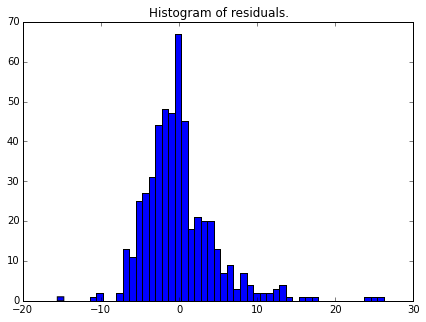

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
ax.hist(boston.target - predictions, bins=50)
ax.set_title("Histogram of residuals.")

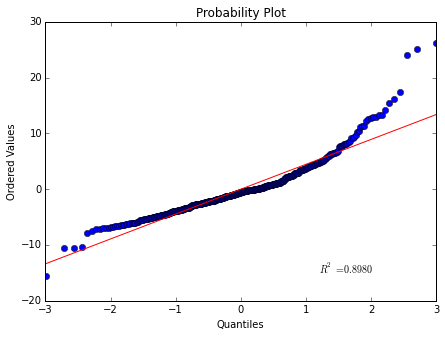

In [6]:
from scipy.stats import probplot
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
probplot(boston.target - predictions, plot=ax);

In [7]:
from sklearn.datasets import make_regression
from sklearn.linear_model import RidgeCV

reg_data, reg_target = make_regression(n_samples=100,
                                       n_features=2, effective_rank=1, noise=10)
rcv = RidgeCV(alphas=np.array([.1, .2, .3, .4]))
rcv.fit(reg_data, reg_target)
rcv.alpha_

0.10000000000000001

* Lasso: L1 norm regulation, can set coefficitents to zeros.
* Ridge: L2 norm regulation, cannot set coefficients to zeros.

## Ch3. Building model with distance metrics

* [KMeans](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html)

### Optimizing the number of centroids

Centroids are difficult to interpret, and it can also be very difficult to determine whether
we have the correct number of centroids. It's important to understand whether your data
is unlabeled or not as this will directly influence the evaluation measures we can use.

Evaluating the model performance for unsupervised techniques is a challenge. Consequently,
sklearn has several methods to evaluate clustering when a ground truth is known, and very
few for when it isn't.

In [8]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans

blobs, classes = make_blobs(500, centers=3)
kmean = KMeans(n_clusters=3)
kmean.fit(blobs)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

Silhouette distance is the ratio of the difference
between in-cluster dissimilarity, the closest out-of-cluster dissimilarity, and the maximum
of these two values. It can be thought of as a measure of how separate the clusters are.

In [9]:
from sklearn import metrics

silhouette_samples = metrics.silhouette_samples(blobs, kmean.labels_)
np.column_stack((classes[:5], silhouette_samples[:5]))

array([[ 1.        ,  0.6498249 ],
       [ 2.        ,  0.69805245],
       [ 2.        ,  0.63163106],
       [ 2.        ,  0.73891368],
       [ 2.        ,  0.74054235]])

(array([   7.,   10.,   19.,   10.,   16.,   38.,   51.,  110.,  148.,   91.]),
 array([ 0.01803156,  0.09495869,  0.17188582,  0.24881295,  0.32574008,
         0.40266721,  0.47959435,  0.55652148,  0.63344861,  0.71037574,
         0.78730287]),
 <a list of 10 Patch objects>)

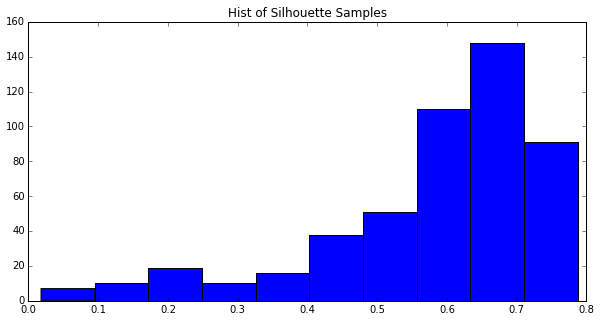

In [10]:
f, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Hist of Silhouette Samples")
ax.hist(silhouette_samples)

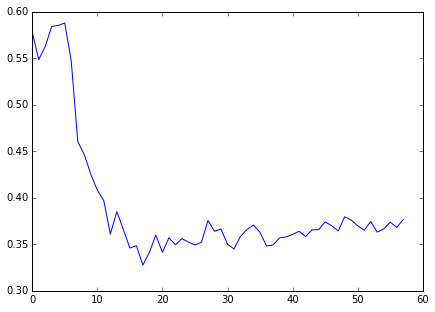

In [11]:
# first new ground truth
blobs, classes = make_blobs(500, centers=10)
sillhouette_avgs = []
# this could take a while
for k in range(2, 60):
    kmean = KMeans(n_clusters=k).fit(blobs)
    sillhouette_avgs.append(metrics.silhouette_score(blobs,
                                                     kmean.labels_))
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(sillhouette_avgs)

### Assessing cluster correctness

/Users/yanshi/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


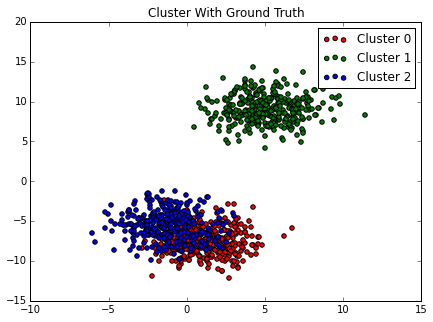

In [12]:
from sklearn import datasets
from sklearn import cluster

blobs, ground_truth = datasets.make_blobs(1000, centers=3, cluster_std=1.75)
f, ax = plt.subplots(figsize=(7, 5))
colors = ['r', 'g', 'b']
for i in range(3):
    p = blobs[ground_truth == i]
    ax.scatter(p[:,0], p[:,1], c=colors[i],
               label="Cluster {}".format(i))
ax.set_title("Cluster With Ground Truth")
ax.legend()

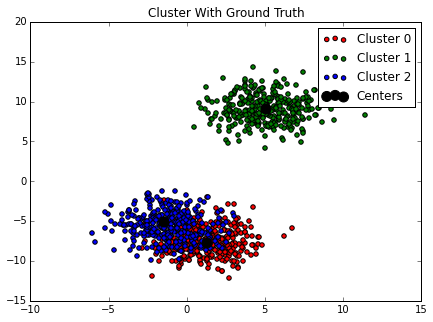

In [13]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(blobs)
f, ax = plt.subplots(figsize=(7, 5))
colors = ['r', 'g', 'b']
for i in range(3):
    p = blobs[ground_truth == i]
    ax.scatter(p[:,0], p[:,1], c=colors[i],
               label="Cluster {}".format(i))
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1], s=100, color='black',
           label='Centers')
ax.set_title("Cluster With Ground Truth")
ax.legend()

## Ch4. Classifying data with scikit-learn


* Naive Bayes
* Decision tree
* Random Forest
* SVM
* Linear Discriminant Analysis (LDA)

LDA attempts to fit a linear combination of features to predict the outcome variable. LDA is often used as a preprocessing step.

LDA is actually fairly similar to clustering that we did previously. We fit a basic model from the
data. Then, once we have the model, we try to predict and compare the likelihoods of the data
given in each class. We choose the option that's more likely.

LDA is actually a simplification of QDA. Here, we
assume that the covariance of each class is the same, but in QDA, the assumption is relaxed.


QDA is the generalization of a common technique such as quadratic regression. It is simply
a generalization of the model to allow for more complex models to fit.

The fundamental idea of how Naïve Bayes works is that we can estimate the probability of
some data point being a class, given the feature vector.
This can be rearranged via the Bayes formula to give the MAP estimate for the feature vector.
This MAP estimate chooses the class for which the feature vector's probability is maximized.

In [4]:
%matplotlib inline
import pydot
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from StringIO import StringIO
from sklearn import tree

X, y = datasets.make_classification(1000, 20, n_informative=3)
dt = DecisionTreeClassifier()
dt.fit(X, y)
str_buffer = StringIO()
tree.export_graphviz(dt, out_file=str_buffer)
graph = pydot.graph_from_dot_data(str_buffer.getvalue())

## Ch5. Postmodel workflow

* K-fold cross validation
* ShuffleSplit

**Difference in KFold and ShuffleSplit output**

KFold will divide your data set into prespecified number of folds, and every sample must be in one and only one fold. A fold is a subset of your dataset.

ShuffleSplit will randomly sample your entire dataset during each iteration to generate a training set and a test set. The test_size and train_size parameters control how large the test and training test set should be for each iteration. Since you are sampling from the entire dataset during each iteration, values selected during one iteration, could be selected again during another iteration.

Summary: ShuffleSplit works iteratively, KFold just divides the dataset into k folds.

Difference when doing validation

In KFold, during each round you will use one fold as the test set and all the remaining folds as your training set. However, in ShuffleSplit, during each round n you should only use the training and test set from iteration n. As your data set grows, cross validation time increases, making shufflesplits a more attractive alternate. If you can train your algorithm, with a certain percentage of your data as opposed to using all k-1 folds, ShuffleSplit is an attractive option.


* Stratified k-fold: intelligently splitting the training and test set into the proportions.

* [GridSearchCV](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html)

